In [1]:
import pandas as pd

df= 'medical_cost_insurance.csv' 
insurance_df = pd.read_csv(df)

# Display the first few rows
print(insurance_df.head())
print(insurance_df.info())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


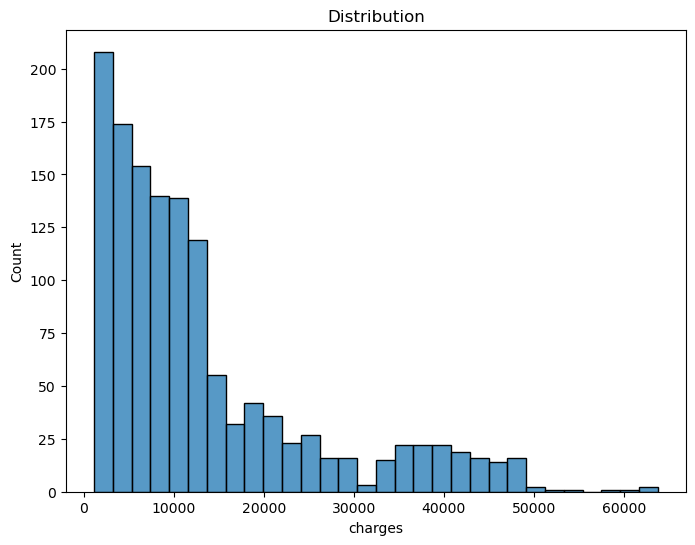

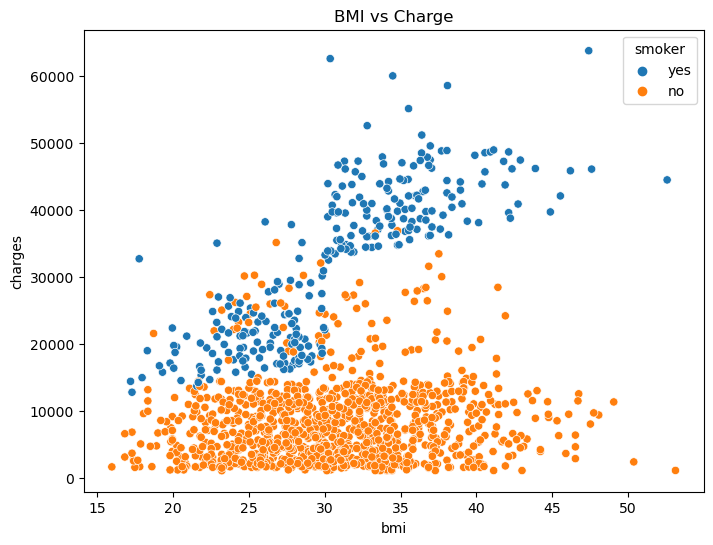

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(insurance_df['charges'])
plt.title('Distribution')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_df, hue='smoker')
plt.title('BMI vs Charge')
plt.show()

In [4]:

from sklearn.model_selection import train_test_split
insurance_df1 = pd.get_dummies(insurance_df, drop_first=True)

X = insurance_df1.drop('charges', axis=1)
y = insurance_df1['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 5796.284659276273


In [6]:
dict_new = {
    'age': 50,
    'bmi': 30,
    'children': 3,
    'sex_male': 1,
    'smoker_yes': 0,
    'region_northwest': 0,
    'region_southeast': 1,
    'region_southwest': 0
}

df_new = pd.DataFrame([dict_new])

df_new = df_new.reindex(columns=X_train.columns, fill_value=0)

predicted_value = model.predict(df_new)
print(f'Predicted Insured Cost: {predicted_value[0]}')

Predicted Insured Cost: 11629.72316206361


Yes,we are predicting accurate prediction cost. 
since the model highlights the importance of individual health and lifestyle factors and efficiently uses previous data to anticipate insurance prices for each individual. 
It gives policyholders and insurers alike insights into healthcare costs and showcases the potential of machine learning in this field.
Maintaining its accuracy and relevance over time is ensured by regular validation against fresh data.